In [22]:
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.regression import linear_model
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

In [23]:
df = pd.read_csv('../data/air_quality_uci.csv', encoding='cp949')
df.head(3)

,Date,Time,CO,PT08_S1,NMHC,C6H6,PT08_S2,NOx,PT08_S3,NO2,PT08_S4,PT08_S5,T,RH,AH
0,2005-02-16,17:00:00,1.6,1083,-200,7.0,856,252,720,148,1010,975,8.2,41.8,0.4563
1,2005-02-16,18:00:00,2.2,1143,-200,9.5,960,313,641,153,1110,1136,7.4,44.5,0.4582
2,2005-02-16,19:00:00,3.4,1288,-200,15.9,1178,433,539,171,1300,1434,7.0,43.4,0.4366


In [24]:
df.shape

(1000, 15)

In [25]:
df['DateTime'] = df['Date'] + ' ' + df['Time']
df.head(3)

,Date,Time,CO,PT08_S1,NMHC,C6H6,PT08_S2,NOx,PT08_S3,NO2,PT08_S4,PT08_S5,T,RH,AH,DateTime
0,2005-02-16,17:00:00,1.6,1083,-200,7.0,856,252,720,148,1010,975,8.2,41.8,0.4563,2005-02-16 17:00:00
1,2005-02-16,18:00:00,2.2,1143,-200,9.5,960,313,641,153,1110,1136,7.4,44.5,0.4582,2005-02-16 18:00:00
2,2005-02-16,19:00:00,3.4,1288,-200,15.9,1178,433,539,171,1300,1434,7.0,43.4,0.4366,2005-02-16 19:00:00


In [26]:
df['DateTime'][3]

'2005-02-16 20:00:00'

In [27]:
type(df['DateTime'][3])

str

In [28]:
df['DateTimeIndex'] = pd.to_datetime(df['DateTime'])
df.head(3)

,Date,Time,CO,PT08_S1,NMHC,C6H6,PT08_S2,NOx,PT08_S3,NO2,PT08_S4,PT08_S5,T,RH,AH,DateTime,DateTimeIndex
0,2005-02-16,17:00:00,1.6,1083,-200,7.0,856,252,720,148,1010,975,8.2,41.8,0.4563,2005-02-16 17:00:00,2005-02-16 17:00:00
1,2005-02-16,18:00:00,2.2,1143,-200,9.5,960,313,641,153,1110,1136,7.4,44.5,0.4582,2005-02-16 18:00:00,2005-02-16 18:00:00
2,2005-02-16,19:00:00,3.4,1288,-200,15.9,1178,433,539,171,1300,1434,7.0,43.4,0.4366,2005-02-16 19:00:00,2005-02-16 19:00:00


In [29]:
type(df['DateTimeIndex'][3])

pandas._libs.tslibs.timestamps.Timestamp

In [30]:
df = df.set_index(keys=['DateTimeIndex'])

In [31]:
df.head(3)

,Date,Time,CO,PT08_S1,NMHC,C6H6,PT08_S2,NOx,PT08_S3,NO2,PT08_S4,PT08_S5,T,RH,AH,DateTime
DateTimeIndex,,,,,,,,,,,,,,,,
2005-02-16 17:00:00,2005-02-16,17:00:00,1.6,1083,-200,7.0,856,252,720,148,1010,975,8.2,41.8,0.4563,2005-02-16 17:00:00
2005-02-16 18:00:00,2005-02-16,18:00:00,2.2,1143,-200,9.5,960,313,641,153,1110,1136,7.4,44.5,0.4582,2005-02-16 18:00:00
2005-02-16 19:00:00,2005-02-16,19:00:00,3.4,1288,-200,15.9,1178,433,539,171,1300,1434,7.0,43.4,0.4366,2005-02-16 19:00:00


In [32]:
df.isnull().sum()

Date        0
Time        0
CO          0
PT08_S1     0
NMHC        0
C6H6        0
PT08_S2     0
NOx         0
PT08_S3     0
NO2         0
PT08_S4     0
PT08_S5     0
T           0
RH          0
AH          0
DateTime    0
dtype: int64

In [33]:
train_ratio = 0.9
n = len(df)
n_train = int(n*train_ratio)
df_train = df[:n_train]
df_test = df[n_train:]

In [34]:
df.columns

Index(['Date', 'Time', 'CO', 'PT08_S1', 'NMHC', 'C6H6', 'PT08_S2', 'NOx',
       'PT08_S3', 'NO2', 'PT08_S4', 'PT08_S5', 'T', 'RH', 'AH', 'DateTime'],
      dtype='object')

In [35]:
features = ['T', 'AH']
target = 'PT08_S4'

X_tn = df_train[features]
y_tn = df_train[target]
X_te = df_test[features]
y_te = df_test[target]

In [36]:
X_tn

,T,AH
DateTimeIndex,,
2005-02-16 17:00:00,8.2,0.4563
2005-02-16 18:00:00,7.4,0.4582
2005-02-16 19:00:00,7.0,0.4366
2005-02-16 20:00:00,6.6,0.4241
2005-02-16 21:00:00,5.9,0.4137
...,...,...
2005-03-26 00:00:00,17.1,1.2926
2005-03-26 01:00:00,16.8,1.3135
2005-03-26 02:00:00,16.6,1.3078


In [37]:
ols_reg = linear_model.OLS(endog=y_tn, exog=X_tn)
ols_model = ols_reg.fit()

In [38]:
ols_model.params

T     92.087713
AH   -87.960934
dtype: float64

In [39]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                PT08_S4   R-squared (uncentered):                   0.791
Model:                            OLS   Adj. R-squared (uncentered):              0.791
Method:                 Least Squares   F-statistic:                              1701.
Date:                Tue, 02 Jul 2024   Prob (F-statistic):                   3.95e-306
Time:                        08:48:27   Log-Likelihood:                         -6942.3
No. Observations:                 900   AIC:                                  1.389e+04
Df Residuals:                     898   BIC:                                  1.390e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
T             92.0877      1.590     57.911      0.000      88.967      95.209
AH           -87.9609      3.266    -26.930      0.000     -94.371     -81.550
==============================================================================
Omnibus:                       56.134   Durbin-Watson:                   0.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.528
Skew:                          -0.622   Prob(JB):                     5.90e-15
Kurtosis:                       3.446   Cond. No.                         2.71
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
ols_model.predict()

array([ 7.14982671e+02,  6.41145375e+02,  6.06210246e+02,  5.70474673e+02,
        5.06928067e+02,  4.24383377e+02,  5.01211345e+02,  4.62573061e+02,
        4.90744733e+02,  4.90727140e+02,  4.99012322e+02,  4.87094354e+02,
        5.95831594e+02,  5.98250520e+02,  5.52153887e+02,  5.69225627e+02,
        6.70020734e+02,  8.90186820e+02,  7.86788070e+02,  7.59056203e+02,
        7.18254079e+02,  7.73770590e+02,  7.73348377e+02,  7.83287224e+02,
        8.12663961e+02,  7.29758631e+02,  6.55771801e+02,  6.38603304e+02,
        6.38752838e+02,  5.92902495e+02,  6.11012175e+02,  5.92533059e+02,
        5.84045568e+02,  5.38045692e+02,  4.72986159e+02,  5.47016969e+02,
        5.93219155e+02,  5.46700309e+02,  5.46383650e+02,  5.92277973e+02,
        7.30242416e+02,  9.52378827e+02,  9.89002806e+02,  1.04478320e+03,
        1.01961100e+03,  9.66284712e+02,  1.00321655e+03,  1.03107157e+03,
        9.84851788e+02,  8.55137342e+02,  7.44605698e+02,  7.25528449e+02,
        6.97576679e+02,  

In [41]:
ols_model.predict(X_te)

DateTimeIndex
2005-03-26 05:00:00    1387.973531
2005-03-26 06:00:00    1370.558743
2005-03-26 07:00:00    1371.579090
2005-03-26 08:00:00    1408.150292
2005-03-26 09:00:00    1489.956110
                          ...     
2005-03-30 04:00:00     973.827329
2005-03-30 05:00:00     854.042934
2005-03-30 06:00:00     928.926965
2005-03-30 07:00:00     902.312202
2005-03-30 08:00:00    1030.707234
Length: 100, dtype: float64

In [42]:
y_tn

DateTimeIndex
2005-02-16 17:00:00    1010
2005-02-16 18:00:00    1110
2005-02-16 19:00:00    1300
2005-02-16 20:00:00    1542
2005-02-16 21:00:00    1294
                       ... 
2005-03-26 00:00:00    1534
2005-03-26 01:00:00    1488
2005-03-26 02:00:00    1361
2005-03-26 03:00:00    1360
2005-03-26 04:00:00    1336
Name: PT08_S4, Length: 900, dtype: int64

In [43]:
X_train = X_tn.asfreq('H')
y_train = y_tn.asfreq('H')

In [44]:
X_test = X_te.asfreq('H')
y_test = y_te.asfreq('H')

In [45]:
y_test

DateTimeIndex
2005-03-26 05:00:00    1309
2005-03-26 06:00:00    1293
2005-03-26 07:00:00    1325
2005-03-26 08:00:00    1458
2005-03-26 09:00:00    1522
                       ... 
2005-03-30 04:00:00    1073
2005-03-30 05:00:00    1109
2005-03-30 06:00:00    1164
2005-03-30 07:00:00    1457
2005-03-30 08:00:00    1533
Freq: H, Name: PT08_S4, Length: 100, dtype: int64

In [46]:
sarimax = ARIMA(endog=y_train, exog=X_train, order=(1,1,0), seasonal_order=(0,1,1,24))
sarimax_fit = sarimax.fit()

In [47]:
sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            PT08_S4   No. Observations:                  900
Model:             ARIMA(1, 1, 0)x(0, 1, [1], 24)   Log Likelihood               -5244.604
Date:                            Tue, 02 Jul 2024   AIC                          10499.208
Time:                                    08:54:37   BIC                          10523.079
Sample:                                02-16-2005   HQIC                         10508.340
                                     - 03-26-2005                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
T            -16.1453      3.231     -4.996      0.000     -22.479      -9.812
AH            24.5826      3.539      6.946      0.000      17.646      31.520
ar.L1         -0.0230      0.026     -0.885      0.376      -0.074       0.028
ma.S.L24      -0.8801      0.015    -59.336      0.000      -0.909      -0.851
sigma2      9040.4793    302.297     29.906      0.000    8447.988    9632.971
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               225.36
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.78   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
sarimax_fit.predict()

DateTimeIndex
2005-02-16 17:00:00    -121.174296
2005-02-16 18:00:00    1022.755962
2005-02-16 19:00:00    1115.900212
2005-02-16 20:00:00    1306.084613
2005-02-16 21:00:00    1552.961913
                          ...     
2005-03-26 00:00:00    1427.921306
2005-03-26 01:00:00    1489.220439
2005-03-26 02:00:00    1425.691600
2005-03-26 03:00:00    1336.854742
2005-03-26 04:00:00    1337.022572
Freq: H, Name: predicted_mean, Length: 900, dtype: float64

In [49]:
sarimax_fit.forecast(steps=len(X_test), exog=X_test)

2005-03-26 05:00:00    1317.998473
2005-03-26 06:00:00    1334.624957
2005-03-26 07:00:00    1413.269919
2005-03-26 08:00:00    1767.346876
2005-03-26 09:00:00    1956.451181
                          ...     
2005-03-30 04:00:00    1571.202454
2005-03-30 05:00:00    1576.185184
2005-03-30 06:00:00    1576.608123
2005-03-30 07:00:00    1660.099112
2005-03-30 08:00:00    1998.104532
Freq: H, Name: predicted_mean, Length: 100, dtype: float64

In [50]:
y_test

DateTimeIndex
2005-03-26 05:00:00    1309
2005-03-26 06:00:00    1293
2005-03-26 07:00:00    1325
2005-03-26 08:00:00    1458
2005-03-26 09:00:00    1522
                       ... 
2005-03-30 04:00:00    1073
2005-03-30 05:00:00    1109
2005-03-30 06:00:00    1164
2005-03-30 07:00:00    1457
2005-03-30 08:00:00    1533
Freq: H, Name: PT08_S4, Length: 100, dtype: int64

C:\Users\User\miniconda3\envs\intensive\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\miniconda3\envs\intensive\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\miniconda3\envs\intensive\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\miniconda3\envs\intensive\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

(array([12868.5, 12869. , 12869.5, 12870. , 12870.5, 12871. , 12871.5,
        12872. , 12872.5]),
 [Text(12868.5, 0, '03-26 12'),
  Text(12869.0, 0, '03-27 00'),
  Text(12869.5, 0, '03-27 12'),
  Text(12870.0, 0, '03-28 00'),
  Text(12870.5, 0, '03-28 12'),
  Text(12871.0, 0, '03-29 00'),
  Text(12871.5, 0, '03-29 12'),
  Text(12872.0, 0, '03-30 00'),
  Text(12872.5, 0, '03-30 12')])

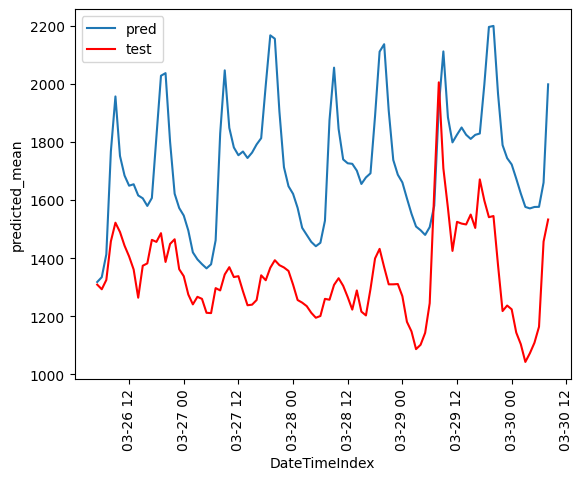

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(sarimax_fit.forecast(steps=len(X_test), exog=X_test), label='pred')
sns.lineplot(y_test, color='red', label='test')
plt.xticks(rotation=90)

In [55]:
arch = arch_model(y_train, vol='ARCH', p=1)
arch_fit = arch.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 6145.472529512024
Iteration:      2,   Func. Count:     10,   Neg. LLF: 6141.004542180426
Iteration:      3,   Func. Count:     14,   Neg. LLF: 6129.2687634324775
Iteration:      4,   Func. Count:     18,   Neg. LLF: 6120.179168927249
Iteration:      5,   Func. Count:     22,   Neg. LLF: 6119.610661065649
Iteration:      6,   Func. Count:     26,   Neg. LLF: 6119.588002745563
Iteration:      7,   Func. Count:     30,   Neg. LLF: 6119.587793126943
Iteration:      8,   Func. Count:     34,   Neg. LLF: 6119.587789379819
Iteration:      9,   Func. Count:     38,   Neg. LLF: 6119.587783770034
Iteration:     10,   Func. Count:     42,   Neg. LLF: 6119.587767089447
Iteration:     11,   Func. Count:     46,   Neg. LLF: 6119.587686890489
Iteration:     12,   Func. Count:     50,   Neg. LLF: 6119.587583732056
Iteration:     13,   Func. Count:     54,   Neg. LLF: 6119.586937589176
Iteration:     14,   Func. Count:     58,   Neg. LLF: 6119.5837

C:\Users\User\miniconda3\envs\intensive\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.674e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [56]:
arch_fit.forecast

<bound method ARCHModelFixedResult.forecast of                       Constant Mean - ARCH Model Results                      
Dep. Variable:                PT08_S4   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -6114.03
Distribution:                  Normal   AIC:                           12234.1
Method:            Maximum Likelihood   BIC:                           12248.5
                                        No. Observations:                  900
Date:                Tue, Jul 02 2024   Df Residuals:                      899
Time:                        09:32:06   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         

In [57]:
pred_var = arch_fit.forecast(horizon=len(y_test))

In [58]:
pred_var.variance.values

array([[  91148.64734654,  101189.59126678,  111230.53518701,
         121271.47910724,  131312.42302748,  141353.36694771,
         151394.31086794,  161435.25478817,  171476.19870841,
         181517.14262864,  191558.08654887,  201599.03046911,
         211639.97438934,  221680.91830957,  231721.86222981,
         241762.80615004,  251803.75007027,  261844.6939905 ,
         271885.63791074,  281926.58183097,  291967.5257512 ,
         302008.46967144,  312049.41359167,  322090.3575119 ,
         332131.30143214,  342172.24535237,  352213.1892726 ,
         362254.13319283,  372295.07711307,  382336.0210333 ,
         392376.96495353,  402417.90887377,  412458.852794  ,
         422499.79671423,  432540.74063447,  442581.6845547 ,
         452622.62847493,  462663.57239516,  472704.5163154 ,
         482745.46023563,  492786.40415586,  502827.3480761 ,
         512868.29199633,  522909.23591656,  532950.17983679,
         542991.12375703,  553032.06767726,  563073.01159749,
        

In [59]:
pred_arch = np.sqrt(pred_var.variance.values[0])

In [60]:
pred_arch

array([ 301.90834262,  318.1031142 ,  333.51242134,  348.24054776,
        362.37056038,  375.96990165,  389.0942185 ,  401.79006308,
        414.09684702,  426.04828673,  437.67349308,  448.99780675,
        460.04344837,  470.83003123,  481.37497051,  491.69381341,
        501.80050824,  511.7076255 ,  521.42654124,  530.96759019,
        540.34019446,  549.55297258,  558.61383226,  567.53004988,
        576.30833885,  584.95490882,  593.475517  ,  601.87551304,
        610.15987832,  618.33326049,  626.40000395,  634.36417685,
        642.22959508,  649.99984363,  657.6782957 ,  665.26812982,
        672.77234521,  680.19377562,  687.53510188,  694.79886315,
        701.98746724,  709.10319988,  716.14823326,  723.12463374,
        730.03436894,  736.87931424,  743.66125869,  750.38191049,
        757.04290203,  763.64579449,  770.19208212,  776.68319621,
        783.12050873,  789.50533571,  795.83894039,  802.12253612,
        808.35728912,  814.54432095,  820.68471091,  826.77949

In [61]:
garch = arch_model(y_train, vol='GARCH', p=15, q=15)
garch_fit = garch.fit()

C:\Users\User\miniconda3\envs\intensive\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.674e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:     34,   Neg. LLF: 6179.791297746277
Iteration:      2,   Func. Count:     67,   Neg. LLF: 6123.397145478621
Iteration:      3,   Func. Count:    101,   Neg. LLF: 6748.969787008376
Iteration:      4,   Func. Count:    137,   Neg. LLF: 7869.9729490697755
Iteration:      5,   Func. Count:    172,   Neg. LLF: 6110.230369907059
Iteration:      6,   Func. Count:    206,   Neg. LLF: 6103.991024259718
Iteration:      7,   Func. Count:    239,   Neg. LLF: 6102.173843623951
Iteration:      8,   Func. Count:    272,   Neg. LLF: 6115.888151787677
Iteration:      9,   Func. Count:    306,   Neg. LLF: 6097.031528521321
Iteration:     10,   Func. Count:    339,   Neg. LLF: 6086.235321025513
Iteration:     11,   Func. Count:    372,   Neg. LLF: 6080.368357302004
Iteration:     12,   Func. Count:    405,   Neg. LLF: 6079.935321776635
Iteration:     13,   Func. Count:    439,   Neg. LLF: 6076.55244545851
Iteration:     14,   Func. Count:    472,   Neg. LLF: 6076.71256

In [62]:
pred_var = garch_fit.forecast(horizon=len(y_test))

In [63]:
pred_garch = np.sqrt(pred_var.variance.values[0])

In [64]:
pred_garch

array([323.35286485, 366.92396456, 430.54862238, 495.68595321,
       534.68542188, 548.31386704, 553.73113365, 550.07275961,
       551.15024984, 549.34714463, 541.40215564, 533.91634746,
       525.93810862, 520.85313694, 518.302843  , 519.63492169,
       525.21897362, 533.18084835, 541.46571472, 549.4236457 ,
       556.40494088, 562.8619596 , 568.63428411, 573.34834038,
       577.14592373, 580.08455599, 582.44336143, 584.44457155,
       586.37785658, 588.53416913, 591.0593244 , 593.95048538,
       597.1599715 , 600.59728437, 604.20937529, 607.93532953,
       611.69203629, 615.41270805, 619.03992029, 622.54072796,
       625.90062332, 629.12669793, 632.24584656, 635.29290971,
       638.29965043, 641.29193172, 644.28721775, 647.29788884,
       650.33108107, 653.38751383, 656.46312583, 659.55009498,
       662.63886014, 665.71956468, 668.7836171 , 671.82500274,
       674.84064782, 677.82996958, 680.79426099, 683.7359464 ,
       686.65813228, 689.56418197, 692.45723995, 695.33

In [67]:
sarimax = ARIMA(endog=y_train, exog=X_train, order=(1,1,0), seasonal_order=(0,1,1,12))
sarimax_fit = sarimax.fit()
sarimax_residual = sarimax_fit.resid

In [68]:
sarimax_residual

DateTimeIndex
2005-02-16 17:00:00    1015.103920
2005-02-16 18:00:00      97.774049
2005-02-16 19:00:00     189.351140
2005-02-16 20:00:00     241.135167
2005-02-16 21:00:00    -249.359669
                          ...     
2005-03-26 00:00:00     111.494736
2005-03-26 01:00:00     -46.802525
2005-03-26 02:00:00    -101.757225
2005-03-26 03:00:00      37.279490
2005-03-26 04:00:00     -22.630145
Freq: H, Length: 900, dtype: float64

In [71]:
adjusted_constant = 0.1
adj_sarimax_residual = sarimax_residual*adjusted_constant

In [72]:
adj_sarimax_residual.describe()

count    900.000000
mean       0.105443
std       12.104562
min      -53.930939
25%       -5.470847
50%       -0.338875
75%        4.947957
max      101.510392
dtype: float64

In [73]:
garch = arch_model(adj_sarimax_residual, vol='GARCH', p=20, q=20)
garch_fit = garch.fit()

Iteration:      1,   Func. Count:     44,   Neg. LLF: 3474.826172840859
Iteration:      2,   Func. Count:     88,   Neg. LLF: 3447.6590917181425
Iteration:      3,   Func. Count:    132,   Neg. LLF: 3564.275193870279
Iteration:      4,   Func. Count:    177,   Neg. LLF: 3674.726598809564
Iteration:      5,   Func. Count:    222,   Neg. LLF: 3523.8571199291305
Iteration:      6,   Func. Count:    266,   Neg. LLF: 3635.7299350347075
Iteration:      7,   Func. Count:    310,   Neg. LLF: 3545.927038979211
Iteration:      8,   Func. Count:    354,   Neg. LLF: 3444.7662891832006
Iteration:      9,   Func. Count:    398,   Neg. LLF: 3493.4899789517926
Iteration:     10,   Func. Count:    442,   Neg. LLF: 3441.8669267846126
Iteration:     11,   Func. Count:    486,   Neg. LLF: 3452.046187574845
Iteration:     12,   Func. Count:    530,   Neg. LLF: 3471.0964387603894
Iteration:     13,   Func. Count:    574,   Neg. LLF: 5750.746098203266
Iteration:     14,   Func. Count:    618,   Neg. LLF: 504

In [74]:
pred_mu = sarimax_fit.forecast(steps=len(X_test), exog=X_test)
pred_mu

2005-03-26 05:00:00    1343.640239
2005-03-26 06:00:00    1424.351508
2005-03-26 07:00:00    1527.959922
2005-03-26 08:00:00    1668.701526
2005-03-26 09:00:00    1635.782585
                          ...     
2005-03-30 04:00:00    1373.488585
2005-03-30 05:00:00    1384.861970
2005-03-30 06:00:00    1464.676263
2005-03-30 07:00:00    1568.636216
2005-03-30 08:00:00    1708.312426
Freq: H, Name: predicted_mean, Length: 100, dtype: float64

In [76]:
adj_forecast_residual = garch_fit.forecast(horizon=len(y_test))
adj_forecast_residual

In [77]:
adj_forecast_residual.variance.values

array([[ 55.99831593, 161.51075012, 180.62888985, 327.49362365,
        300.19281186, 254.0584814 , 173.86275216, 156.24596151,
        107.82230881,  93.24096041,  70.42552374,  71.73987649,
         84.98725664, 145.98211455, 183.04852867, 256.37775853,
        256.67294807, 232.71799104, 186.65324558, 161.13176726,
        127.59120139, 108.83352164,  92.02320726,  91.4744521 ,
        103.45699718, 141.28829588, 175.02714604, 217.28503064,
        225.60692538, 214.24504612, 187.29953861, 164.64581777,
        139.6736002 , 121.89229867, 108.58604742, 106.80076382,
        115.96637709, 140.49155572, 166.70646288, 193.86800149,
        203.64792226, 199.18233182, 183.33727943, 165.88422723,
        147.03178998, 131.8533969 , 121.0323953 , 118.55658167,
        124.88157002, 141.13089461, 160.36924837, 179.03720844,
        188.10479673, 187.2680608 , 178.03592871, 165.4304101 ,
        151.31601681, 139.01939981, 130.19588612, 127.43397148,
        131.44275991, 142.2739019 , 156.

In [78]:
forecast_residual = np.sqrt(adj_forecast_residual.variance.values)/adjusted_constant
forecast_residual

array([[ 74.83202251, 127.08687978, 134.3982477 , 180.96784898,
        173.26073181, 159.3921207 , 131.85702566, 124.99838459,
        103.83752155,  96.56135894,  83.91991643,  84.6993958 ,
         92.18853326, 120.82305846, 135.29542811, 160.11800602,
        160.21015825, 152.55097215, 136.62109851, 126.93768836,
        112.95627534, 104.32330595,  95.92872733,  95.64227732,
        101.71381282, 118.86475335, 132.29782539, 147.40591258,
        150.20217222, 146.37111946, 136.85742165, 128.31438648,
        118.18358609, 110.40484531, 104.20462918, 103.34445501,
        107.68768597, 118.52913385, 129.11485696, 139.23649001,
        142.70526348, 141.1319708 , 135.40209726, 128.79605088,
        121.25666579, 114.8274344 , 110.01472415, 108.883691  ,
        111.75042283, 118.79852466, 126.63698053, 133.80478633,
        137.15130212, 136.84592095, 133.43010482, 128.61975357,
        123.01057548, 117.90648829, 114.10341192, 112.8866562 ,
        114.64848883, 119.2786242 , 124.

In [79]:
pred_residual = pd.Series(forecast_residual[-1,:], index=y_test.index)
pred_residual

DateTimeIndex
2005-03-26 05:00:00     74.832023
2005-03-26 06:00:00    127.086880
2005-03-26 07:00:00    134.398248
2005-03-26 08:00:00    180.967849
2005-03-26 09:00:00    173.260732
                          ...    
2005-03-30 04:00:00    119.298729
2005-03-30 05:00:00    119.468514
2005-03-30 06:00:00    120.730706
2005-03-30 07:00:00    122.672096
2005-03-30 08:00:00    124.716933
Freq: H, Length: 100, dtype: float64

In [80]:
e_t = np.random.randn(len(X_test))
y_hat = pred_mu + pred_residual*e_t

In [81]:
y_hat

2005-03-26 05:00:00    1288.537886
2005-03-26 06:00:00    1759.495180
2005-03-26 07:00:00    1722.475760
2005-03-26 08:00:00    1769.228807
2005-03-26 09:00:00    1282.932447
                          ...     
2005-03-30 04:00:00    1355.384995
2005-03-30 05:00:00    1411.292454
2005-03-30 06:00:00    1417.010773
2005-03-30 07:00:00    1524.107075
2005-03-30 08:00:00    1834.414652
Freq: H, Length: 100, dtype: float64

In [82]:
y_test

DateTimeIndex
2005-03-26 05:00:00    1309
2005-03-26 06:00:00    1293
2005-03-26 07:00:00    1325
2005-03-26 08:00:00    1458
2005-03-26 09:00:00    1522
                       ... 
2005-03-30 04:00:00    1073
2005-03-30 05:00:00    1109
2005-03-30 06:00:00    1164
2005-03-30 07:00:00    1457
2005-03-30 08:00:00    1533
Freq: H, Name: PT08_S4, Length: 100, dtype: int64

C:\Users\User\miniconda3\envs\intensive\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\miniconda3\envs\intensive\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\miniconda3\envs\intensive\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\miniconda3\envs\intensive\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

(array([12868.5, 12869. , 12869.5, 12870. , 12870.5, 12871. , 12871.5,
        12872. , 12872.5]),
 [Text(12868.5, 0, '03-26 12'),
  Text(12869.0, 0, '03-27 00'),
  Text(12869.5, 0, '03-27 12'),
  Text(12870.0, 0, '03-28 00'),
  Text(12870.5, 0, '03-28 12'),
  Text(12871.0, 0, '03-29 00'),
  Text(12871.5, 0, '03-29 12'),
  Text(12872.0, 0, '03-30 00'),
  Text(12872.5, 0, '03-30 12')])

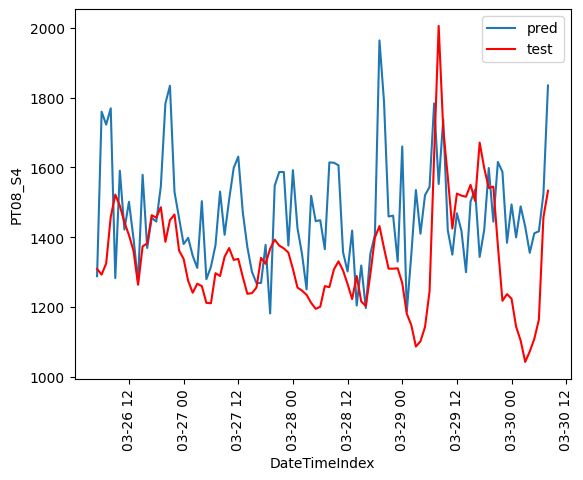

In [84]:
sns.lineplot(y_hat, label='pred')
sns.lineplot(y_test, color='red', label='test')
plt.xticks(rotation=90)